<a href="https://colab.research.google.com/github/FuturisticLover123/labs/blob/main/lab8/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# task1

In [25]:
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import cross_val_score

class NBC:
  def pxy(self, distibution, x, cld):
    if distibution == "gaussian":
      m, q = cld
      return (1 / (q * np.sqrt(2 * np.pi)) ) * np.exp(-((x - m)**2 / (2 * q**2)))

  def get_cl_data(self, distibution, x):
    if distibution == "gaussian":
      return np.mean(x), np.std(x)

  def fit(self, x, y, feature_distribution: dict = {}):
    self.x, self.y = x, y
    self.classes = list(set(y))
    self.feature_distribution = feature_distribution
    indexes = { clas : np.where(y == clas)[0] for clas in self.classes }

    self.prior_probability = { clas : len(indexes[clas]) / len(y) for clas in indexes }

    self.classifying_data = dict()
    for clas in self.classes:
      self.classifying_data[clas] = self.classifying_data.get(clas, dict())
      for feature in range(x.shape[1]):
        distribution = self.feature_distribution.get(feature, "gaussian")
        self.classifying_data[clas][feature] = self.get_cl_data(distribution, x[indexes[clas]][: ,feature])
    return self

  def classify(self, x):
    weights = { clas : np.log(self.prior_probability[clas]) for clas in self.classes }
    for clas in self.classes:
      for feature in range(len(x)):
        distribution = self.feature_distribution.get(feature, "gaussian")
        weights[clas] += np.log( self.pxy(distribution, x[feature], self.classifying_data[clas][feature]) )
    return max(weights, key=weights.get)

  def predict(self, x):
    return np.array([self.classify(x_i) for x_i in x])

  def score(self, x, y):
    y_pred = self.predict(x)
    return accuracy_score(y, y_pred)

  def get_params(self, deep=True):
    return {
    }

  def set_params(self, **params):
    for key, value in params.items():
        setattr(self, key, value)
    return self


In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [28]:
x,y = make_classification(n_samples = 1000,n_features = 30,n_redundant=20)
model = NBC()
cross_val_score(model, x, y, cv=10).mean()

0.9299999999999999

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
cross_val_score(model, x, y, cv=10).mean()

0.9279999999999999

In [30]:
#может
x, y = make_classification(n_samples = 50, n_features = 50, n_informative = 5, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
model = NBC().fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9
0.6


In [ ]:
#task2 телефоны

In [ ]:
import pandas as pd

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d valakhorasani/mobile-device-usage-and-user-behavior-dataset -p /content/sample_data/lab8
!unzip /content/sample_data/lab8/mobile-device-usage-and-user-behavior-dataset.zip -d /content/sample_data/lab8

Dataset URL: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset
License(s): apache-2.0
mobile-device-usage-and-user-behavior-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/sample_data/lab8/mobile-device-usage-and-user-behavior-dataset.zip
replace /content/sample_data/lab8/user_behavior_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv("/content/sample_data/lab8/user_behavior_dataset.csv").dropna()

In [ ]:
data.head(1)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4


In [ ]:
data["Device Model"] = data["Device Model"].apply(lambda x: x.split(' ')[0])

In [ ]:
data.head(1)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google,Android,393,6.4,1872,67,1122,40,Male,4


In [ ]:
x = pd.get_dummies(data, columns = ['Device Model', 'Operating System', 'Gender']).drop(columns = ['User ID', 'User Behavior Class']).astype(float).values
y = data['User Behavior Class'].values

In [ ]:
#кайф
model = NBC()
cross_val_score(model, x, y, cv=10).mean()

1.0

In [ ]:
#task 3

In [ ]:
data = pd.read_csv('/content/sample_data/lab8/spam.csv', encoding='Windows-1251').drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']).dropna()

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    words = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)


text = "I running love programming in Python, and I enjoy solving coding challenges!"

processed_text = preprocess_text(text)
print(processed_text)


run love program python enjoy solv code challeng


In [ ]:
data['v2'] = data['v2'].apply(preprocess_text)

In [ ]:
x = data['v2'].values
y = data['v1'].map({ 'spam' : 0, 'ham':1 }).values

In [ ]:
class CategoricalNBC(NBC):
  def __init__(self, alpha=1):
    super().__init__()
    self.alpha=alpha

  def fit(self, x, y):
    self.x, self.y = x, y
    self.classes, clf_counts = np.unique(y, return_counts=True)
    self.clf_counts = {c: clf for c, clf in zip(self.classes, clf_counts)}
    self.prior = {c: self.clf_counts[c] / len(y) for c  in self.clf_counts}

    self.frequency = dict()
    self.words_in_class = dict()
    self.words = set()

    for c in self.classes:
      self.frequency[c] = dict()
      self.words_in_class[c] = set()


      for message in x[np.where(y == c)[0]]:
        for word in message.split(' '):
          self.words_in_class[c].add(word)
          self.words.add(word)
          self.frequency[c][word] = self.frequency[c].get(word, 0) + 1
    self.words_in_class = {c : len(self.words_in_class[c]) for c in self.classes}

    self.ni = len(self.words)
    return self

  def classify(self, x):
    weights = { c: np.log(self.prior[c]) for c in self.prior }
    for c in self.classes:
      for word in x.split(' '):
        weights[c] += np.log((self.frequency[c].get(word, 0) + self.alpha) / (self.words_in_class[c] + self.ni * self.alpha))
    return max(weights, key=weights.get)

In [ ]:
model = CategoricalNBC(alpha=1)
cross_val_score(model, x, y, cv=5).mean()

0.9755924998591107

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p /content/sample_data/lab8;
!unzip /content/sample_data/lab8/imdb-dataset-of-50k-movie-reviews.zip -d /content/sample_data/lab8;


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/sample_data/lab8/imdb-dataset-of-50k-movie-reviews.zip
replace /content/sample_data/lab8/IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data = pd.read_csv("/content/sample_data/lab8/IMDB Dataset.csv", encoding="UTF-8")

In [ ]:
data.head(1)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [ ]:
data['review'] = data['review'].apply(preprocess_text)

In [ ]:
data.to_csv("/content/sample_data/lab8/films.csv", index = False)

In [ ]:
data = pd.read_csv("/content/sample_data/lab8/films.csv").dropna()

In [ ]:
data.head(2)

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product br br film techniqu unass...,positive


In [ ]:
x = data['review'].values
y = data['sentiment'].map({ 'negative' : 0, 'positive':1 }).values

In [ ]:
model = CategoricalNBC()

In [ ]:
model.fit(x, y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9028266666666667
0.91008


In [ ]:
#task 4

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_probs = nb_model.predict_proba(X_test)[:, 1]


In [133]:
class IsotonicRegression:
  def __init__(self):
    pass

  def fit(self, y_probs, y_true):
    self.x, self.y = x, y

    dta = np.dstack([np.array(y_probs),np.array(y_true), y_true])[0]
    self.result = dta[dta[:, 0].argsort()]
    while self.sort():
      continue
    return self


  def sort(self):
    flag = False
    for i in range(len(self.result)-1):
      if self.result[i][1] - self.result[i + 1][1] < 1e-6:
        continue
      else:
        flag=True
        self.result[i + 1][1] = (self.result[i][1] + self.result[i + 1][1]) / 2
        self.result[i][1] = (self.result[i][1] + self.result[i + 1][1]) / 2
    return flag



In [134]:
reg= IsotonicRegression().fit(y_probs, y_test)

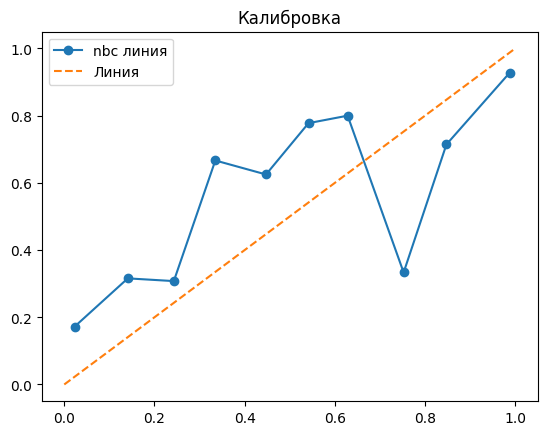

0.848

In [136]:
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_probs, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label='nbc линия')
plt.plot([0, 1], [0, 1], linestyle='--', label='Линия')

plt.title('Калибровка')
plt.legend()
plt.show()
nb_model.score(X, y)

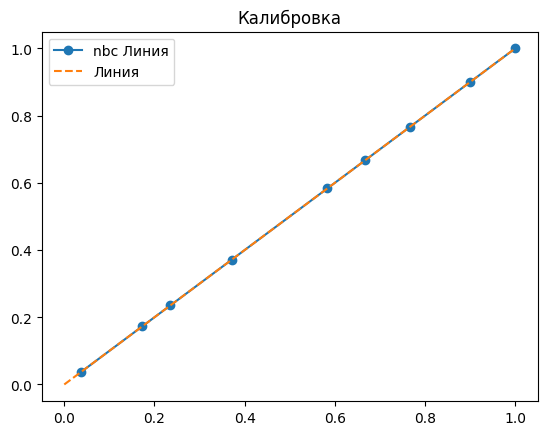

In [137]:
calibrated_nb_isotonic = CalibratedClassifierCV(nb_model, method='isotonic', cv='prefit')
calibrated_nb_isotonic.fit(X_test, y_test)

y_probs_isotonic = calibrated_nb_isotonic.predict_proba(X_test)[:, 1]

fraction_of_positives_isotonic, mean_predicted_value_isotonic = calibration_curve(y_test, y_probs_isotonic, n_bins=10)

plt.plot(mean_predicted_value_isotonic, fraction_of_positives_isotonic, marker='o', label='nbc Линия')
plt.plot([0, 1], [0, 1], linestyle='--', label='Линия')

plt.title('Калибровка')
plt.legend()
plt.show()
